# Bayesian Data Analysis

The fundamental objective of Bayesian data analysis is to determine the posterior distribution: $p(\theta|X)=\frac{p(X|\theta)p(\theta)}{p(X)}$

where the denominator is: $p(X)=\int d\theta^* p(X|\theta^*)p(\theta^*)$

Here, $p(X|\theta)$ is the likelihood, $p(\theta)$ is the prior, and $p(X)$ is a normalizing constant also known as the evidence or marginal likelihood. 

The computational issue is the difficulty of evaluating the integral in the denominator. There are many ways to address this difficulty, including: 1. In case with conjugate priors (with conjugate priors, the posterior has the same distribution as the prior), we can get closed form solution. 2. We can use numerical integration. 3. We can approximate the functions used to calculate the posterior with simpler functions and show that the resulting approximate posterior is "close" to true posterior (variational Bayes). 4. We can use Monte Carlo methods, of which the most important is Markov Chain Monte Carlo (MCMC).

# Motivating example

Use the toy example of estimating the bias of a coin given a sample consisting of $n$ tosses to illustrate a few of the approaches.

If we use a beta distribution as the prior, then the posterior distribution has a closed form solution. 
The mode of the posterior distribution is known as the maximum a posteriori (MAP) estimate (cf MLE which is the mode of the likelihood). 

In [10]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

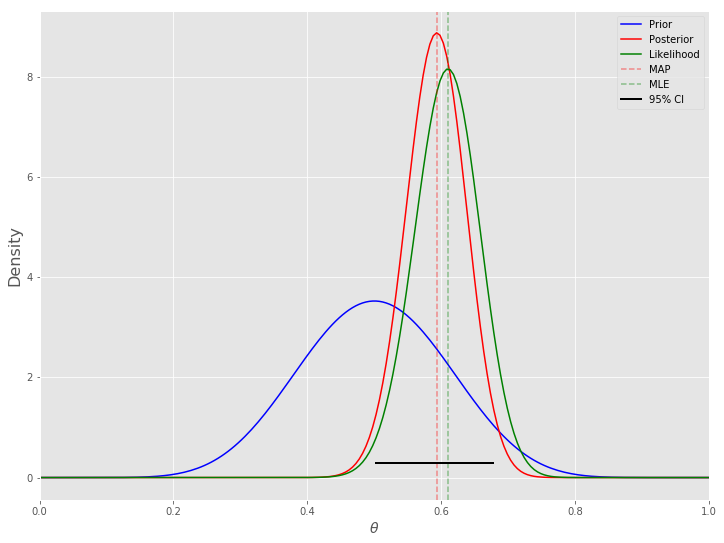

In [23]:
n = 100
h = 61
p = h/n
rv = st.binom(n,p)
mu = rv.mean()

a,b=10,10
prior = st.beta(a,b)
post = st.beta(h+a,n-h+b)
ci = post.interval(0.95)

thetas = np.linspace(0,1,200)
plt.figure(figsize=(12,9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.plot(thetas, n*st.binom(n,thetas).pmf(h), label='Likelihood', c='green')
plt.axvline((h+a-1)/(n+a+b-2), c = 'red', linestyle = 'dashed', alpha = 0.4, label='MAP')
plt.axvline(mu/n, c = 'green', linestyle='dashed', alpha=0.4, label='MLE')
plt.xlim([0,1])
plt.axhline(0.3,ci[0],ci[1],c='black',linewidth=2, label='95% CI');
plt.xlabel(r'$\theta$',fontsize = 14)
plt.ylabel('Density',fontsize = 16)
plt.legend();


# Numerical Integration

One simple way of numerical integration is to estimate the values on a grid of values for $\theta$. To calculate the posterior, we find the prior and the likelihood for each value of $\theta$, and for the marginal likelihood, we replace the integral with the equivalent sum $p(X)=\sum_{\theta^*} p(X|\theta^*)P(\theta^*)$.

One advantage of this is that the prior does not have to be conjugate, and so we are not restricted in our choice of an appropriate prior distribution. For example, the prior can be a mixture distribution or estimated empirically from data. The disadvantage, of course, is that this is computationally very expensive when we need to estimate multiple parameters, since the number of grid points grows as $O(n^d)$, where $n$ defines the grid resolution and $d$ is the size of $\theta$.

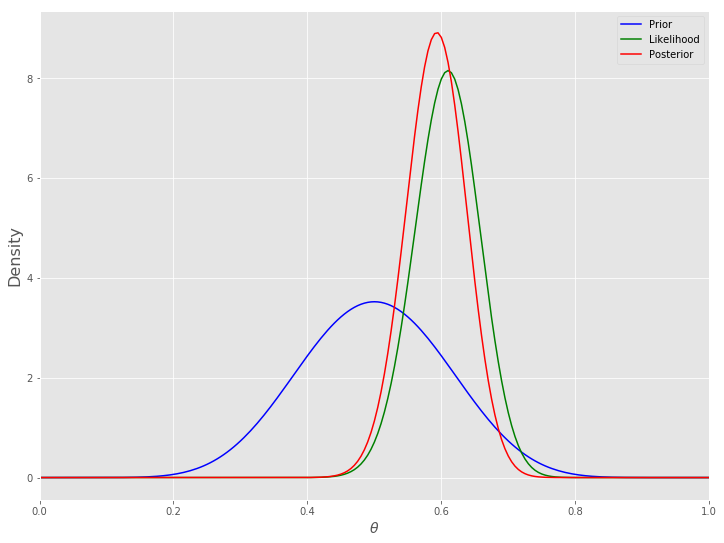

In [46]:
thetas = np.linspace(0,1,201)
prior = st.beta(a,b)

post = prior.pdf(thetas) * st.binom(n,thetas).pmf(h)
post/=(post.sum()/len(thetas)) 

plt.figure(figsize=(12, 9))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas),label='Prior',c='blue')
plt.plot(thetas, n*st.binom(n,thetas).pmf(h), label='Likelihood', c ='green')

plt.plot(thetas, post, label='Posterior', c='red')
plt.xlim([0,1])
plt.xlabel(r'$\theta$',fontsize = 14)
plt.ylabel('Density',fontsize = 16)
plt.legend();

# Metropolis-Hastings sampler

In Bayesian statistics, we want to estimate the posterior distribution, but this is often intractable due to the high-dimensional integral in the denominator (marginal likelihood). 